## Homework #3
### October 27, 2021
### Jake Postiglione

1. If you had to eliminate one feature without compromising performance too much, which one would you pick, and why?

        If I had to eliminate one feature of the habitability set, it would be the distance from the parent star.
        It seems like, with the data we have, just two features of stellar mass and orbital period are enough for the model
        to correctly classify new planets.

2. In class, we used k = 3 neighbors in the kNN algorithm. Would you recommend increasing the number of neighbors used in the classification for this data set? Why or why not? (Please note that providing the answer without a justification, whether as reasoning or in code, will not get any points!)

        For this dataset, I would not recommended a higher value for k. I think, for the kNN algorithm, a careful consideration
        needs to be taken into account to make sure your k value is large enough to correctly classify object, but not too large
        to the point where unwanted "noise" contributes to the classification of an object. I think if the data was extreamly
        clustered and clumped together, having a large k value may actually be benificial; however, I think that with this
        algorithm in general, the "boundery lines" seperating different classifications can contain a number of false positives / negatives.

3. Assuming that the maximum Gini impurity is obtained when the objects are uniformly distributed among classes, figure out the maximum Gini impurity in a N-class classification problem.

        The maximum gini impurity for any number of features is 0.5, this is becausethe best "split" you can make in a data
        would only include up to half of the objects being incorrectly classified.

4. If you used the two decision trees obtained in the IntroDT notebook from 10/18, using the first 13 and last 13 objects as training set respectively (you can see the notebooks also in the slides from 10/13), to classify the Earth as habitable or not habitable, what verdict would you obtain? (show your thought process!) What can you conclude from this result?

        Based on the first decision tree, the Earth would be classified as not habitable since our solar mass is greater than 0.83.

        Based on the second decision tree, the Earth would be classified as habitiable. This is because the first check
    of stellar mass would return false, the next check of distance would also return false, finally the last check of
    solar mass would say that the earth is habitable.

Extra credit: Write pseudo-code (a sequence of operations, like the one we showed in class for DT) for the kNN algorithm.

function knnClassification(trainingSet, tetData, kValue):
    classificationDict

    # Loop over each test object
    for testObject in testData:
        distanceDict

        # Calculate euclidean distance to each training object
        for trainingObject in trainingSet:
            distanceDict[trainingObject] = euclideanDist(testObject, trainingObject)

        # Sort distances by accending order
        sortAccending(distanceDict)

        # Classify test object based on k number of closest objects
        classOne = 0
        classTwo = 0
        for i in range(0, kValue):
            if distanceDict[i] is classOne:
                classOne += 1
            else:
                classTwo += 1

        classificationDict[testObject] = classOne if classOne > classTwo else classTwo

    return classificationDict

### Coding Exercises

For both the DT and kNN algorithms, check what happens to the test scores if you vary the training/test set size (for example, 16/2 and 11/10, but using more combinations won't hurt). Comment your results.


In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import neighbors

font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['figure.dpi'] = 300

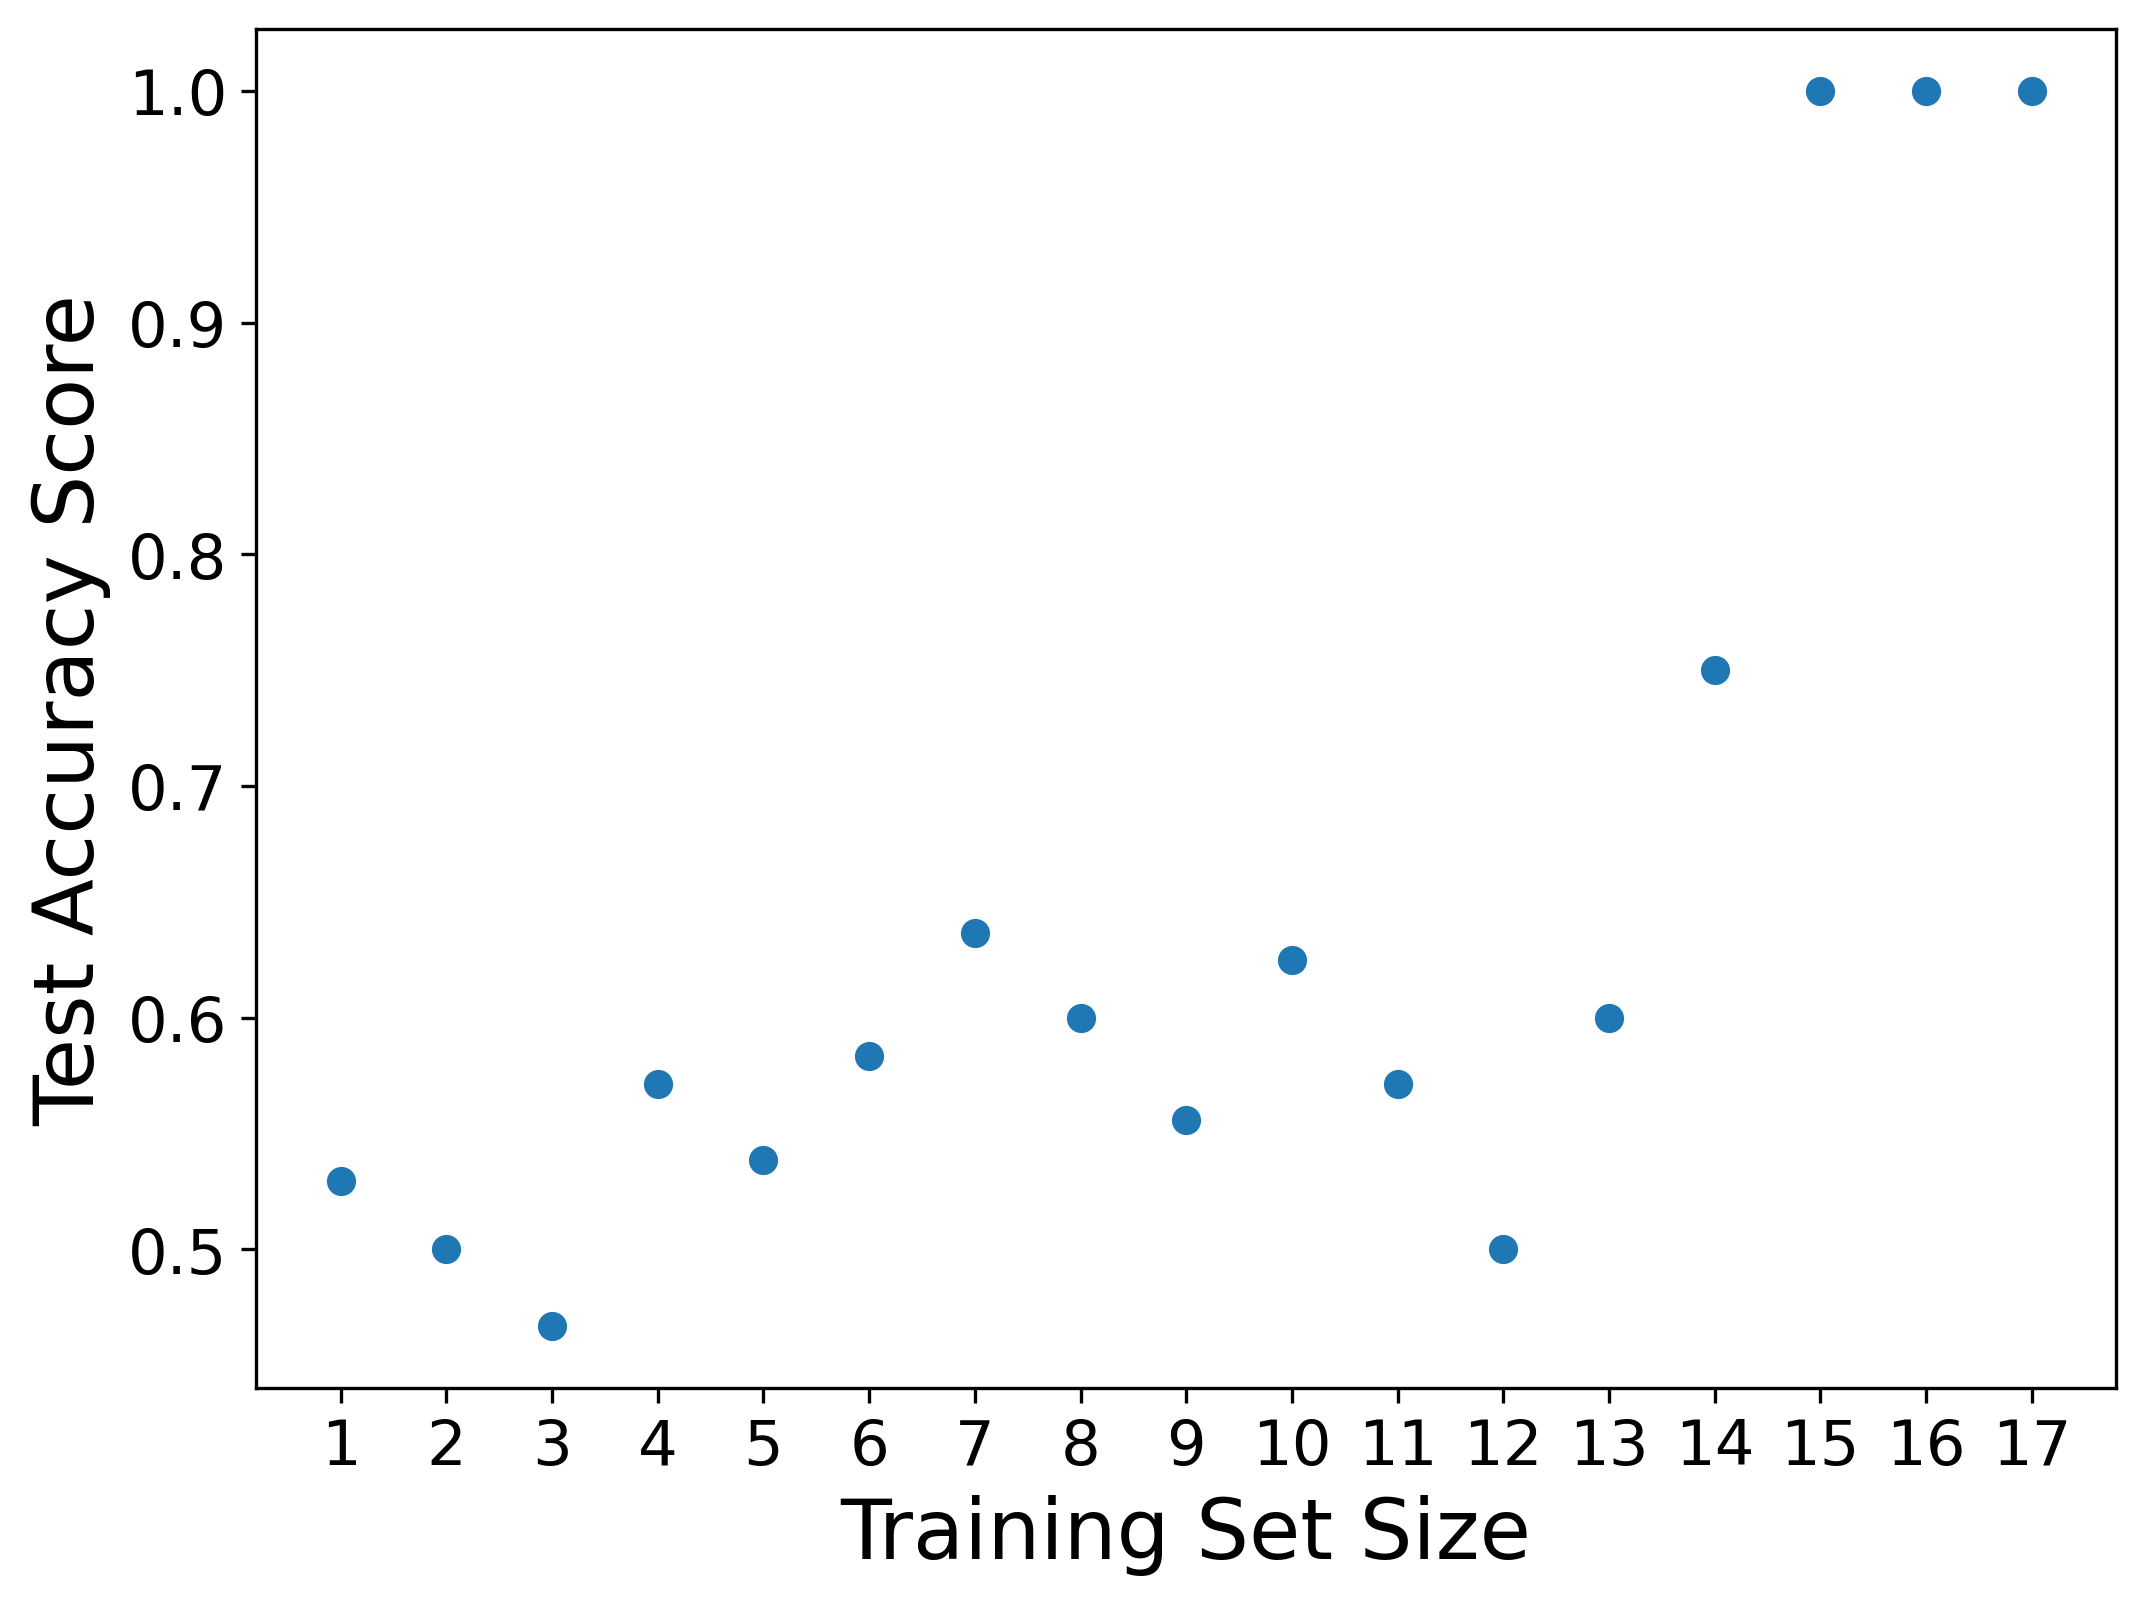

In [93]:
learningSet = pd.read_csv('HPLearningSet.csv')
learningSet = learningSet.drop(learningSet.columns[0], axis=1)

testAccuracyScores = []

for i in range(1, 18):

    trainSet =  learningSet.iloc[:i,:]
    testSet = learningSet.iloc[i:,:]

    trainFeatures = trainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
    testFeatures = testSet.drop(['P_NAME','P_HABITABLE'],axis=1)

    trainTargets = trainSet.P_HABITABLE
    testTargets = testSet.P_HABITABLE

    model = DecisionTreeClassifier(random_state = 3)
    model.fit(trainFeatures, trainTargets)

    testAccuracyScores.append(metrics.accuracy_score(testTargets, model.predict(testFeatures)))

plt.figure(figsize=(8,6))
plt.xlabel('Training Set Size')
plt.ylabel('Test Accuracy Score')
plt.xticks(range(1, 18))

plt.scatter(range(1,18), testAccuracyScores)

        In observation of changing the test size to training size ratio I find that, as a general rule of thumb, the test
        accuracy score increases as the training set size increases. This makes sense since the model will better be able
        to predict the classification of a test object with more training objects to compare it to.

        I think with such a small data set, the variance in the test set accuracy is pretty high. I suspect that with such a
        small dataset, changing the order would also have a significant effect on the test accuracy scores with certain
        training to test set ratios.

Average 0.6167600917600917


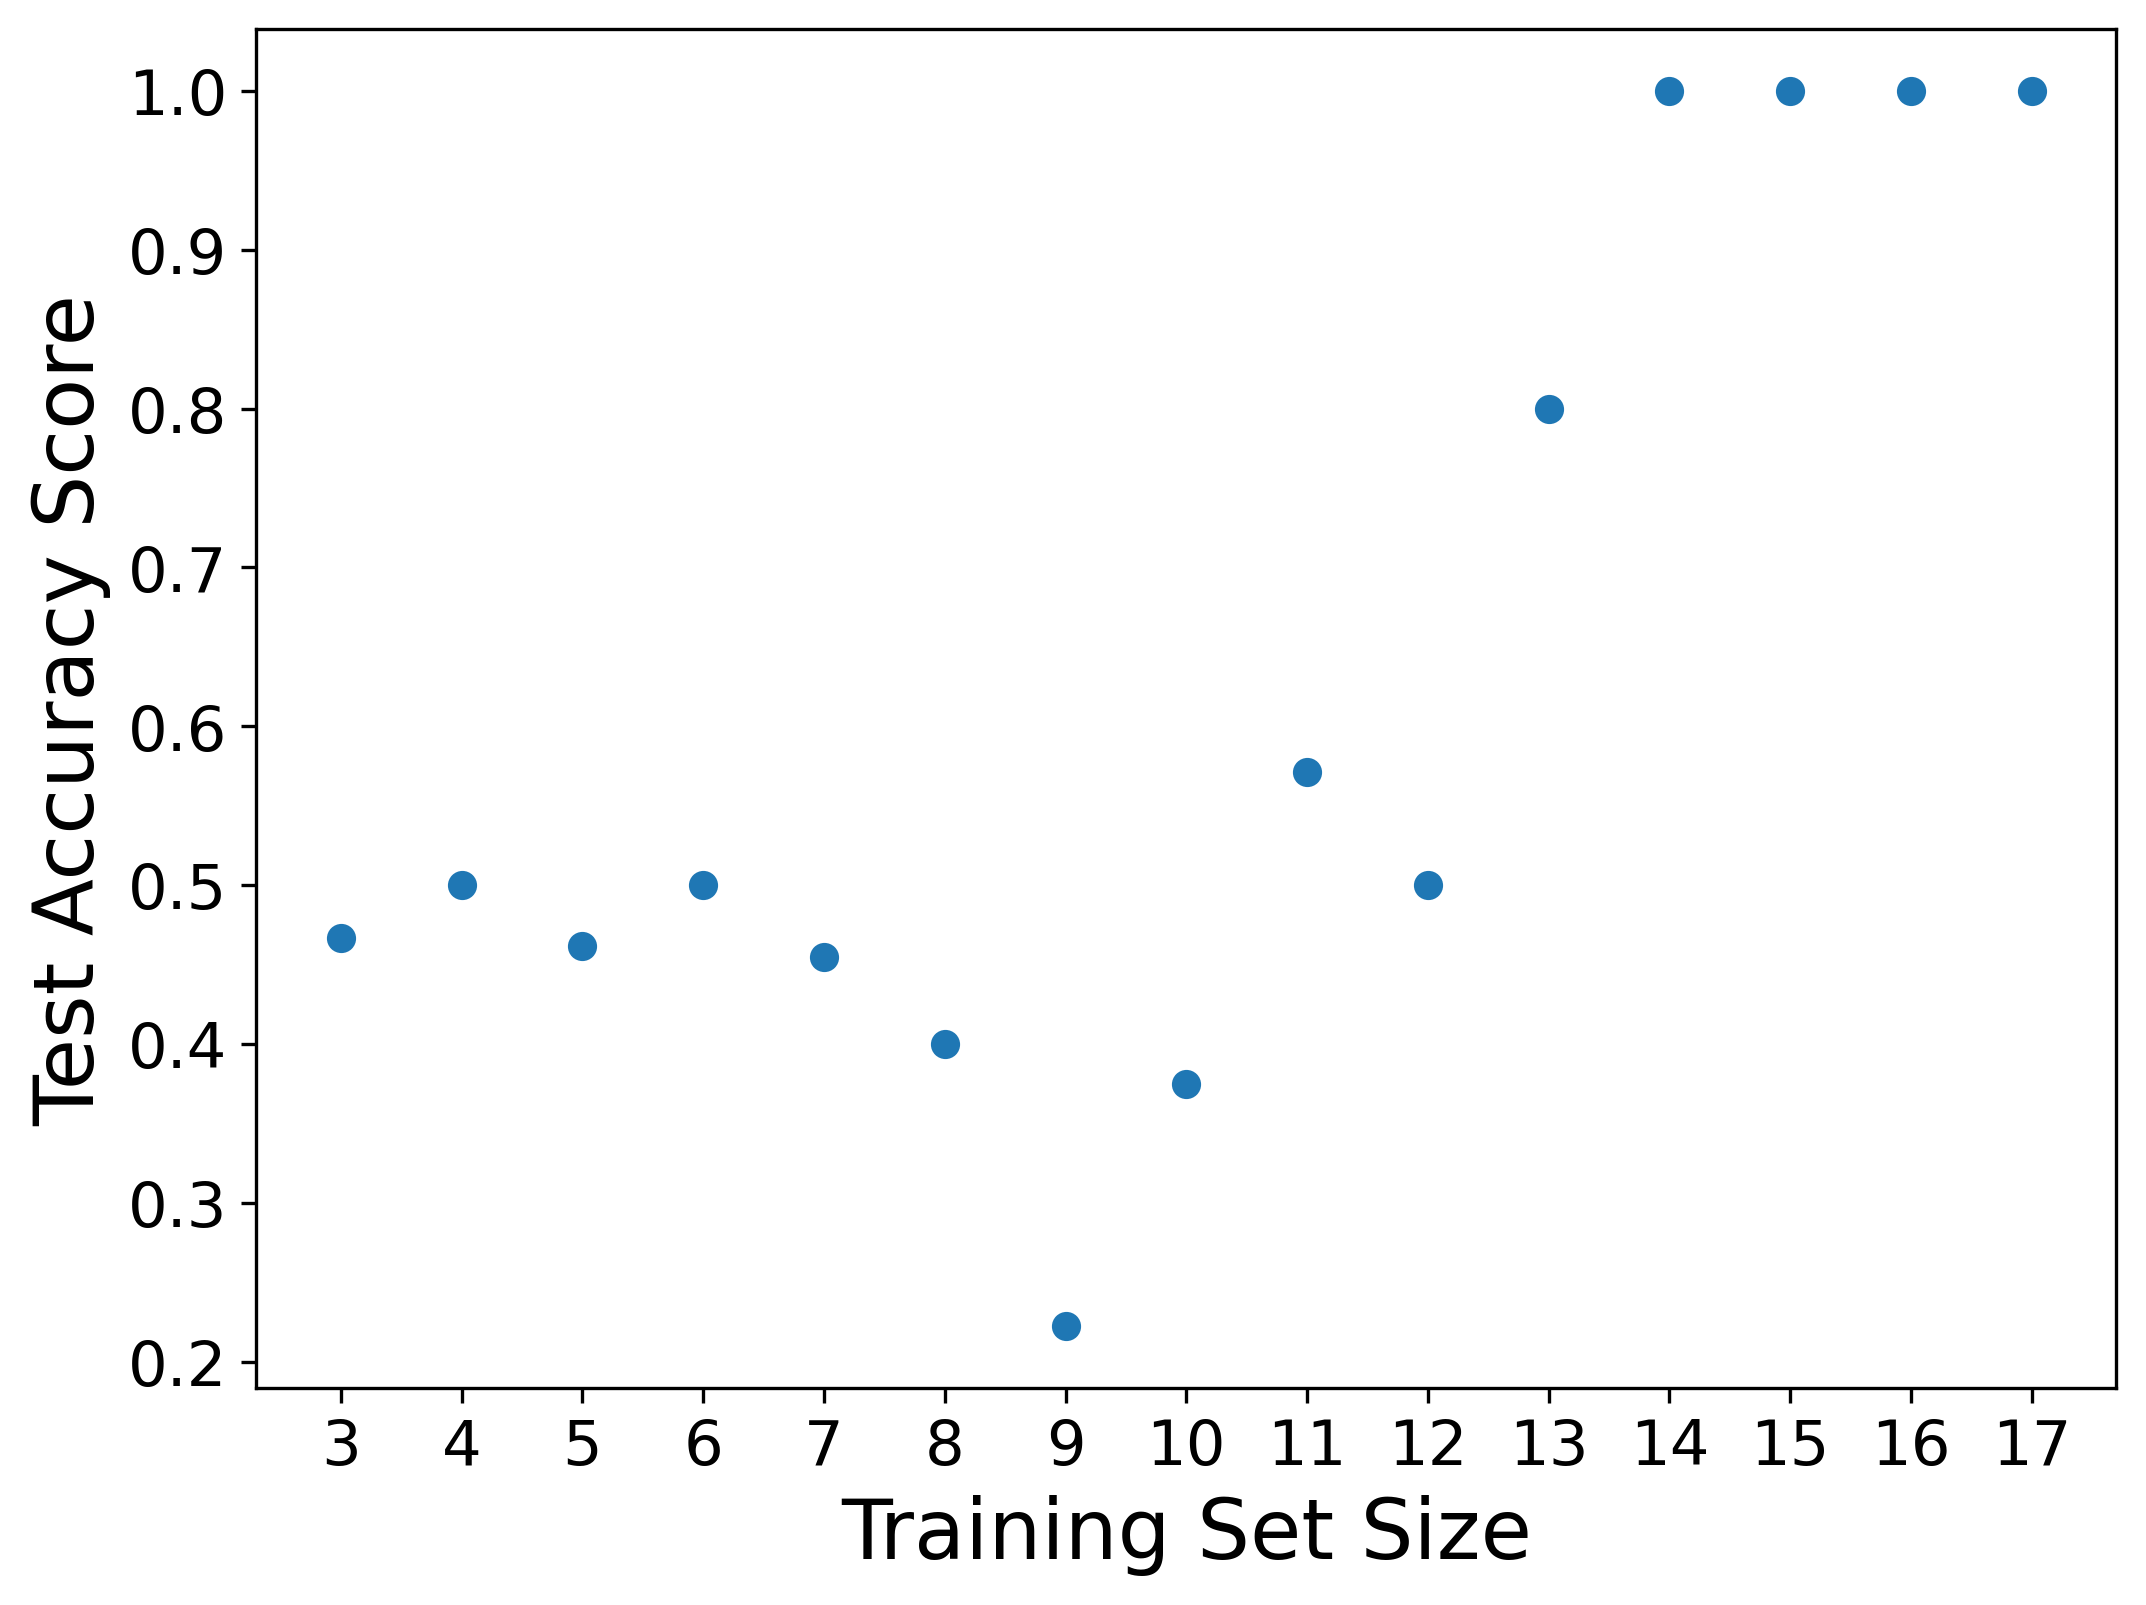

In [94]:
learningSet = pd.read_csv('HPLearningSet.csv')
learningSet = learningSet.drop(learningSet.columns[0], axis=1)

testAccuracyScores = []

for i in range(3, 18):

    trainSet =  learningSet.iloc[:i,:]
    testSet = learningSet.iloc[i:,:]

    trainFeatures = trainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
    testFeatures = testSet.drop(['P_NAME','P_HABITABLE'],axis=1)

    trainTargets = trainSet.P_HABITABLE
    testTargets = testSet.P_HABITABLE

    model = neighbors.KNeighborsClassifier(n_neighbors = 3)

    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(trainFeatures)
    scaledTrainFeatures = scaler.transform(trainFeatures)
    scaledTestFeatures = scaler.transform(testFeatures)

    model.fit(scaledTrainFeatures[:,:2], trainTargets)

    testAccuracyScores.append(metrics.accuracy_score(testTargets, model.predict(scaledTestFeatures[:,:2])))

plt.figure(figsize=(8,6))
plt.xlabel('Training Set Size')
plt.ylabel('Test Accuracy Score')
plt.xticks(range(3, 18))

plt.scatter(range(3,18), testAccuracyScores)

print("Average", np.mean(testAccuracyScores))

        Like with the decision tree model, as the train set size increases so does the test accuracy score.

        Something interesting of note here, the model needs at least k number of neighbors to be able to properly classify
        test objects. Because of this, the smallest training set size must be equal to or greater than the value of k.

Re-do the kNN exercise using the ``StandardScaler" option instead of the ``RobustScaler". What happens to the test set accuracy? Which one would you recommend using? (bonus points if you plot each point and their neighbors for the Robust Scaler and the Standard Scaler).

Average 0.6041674991674991


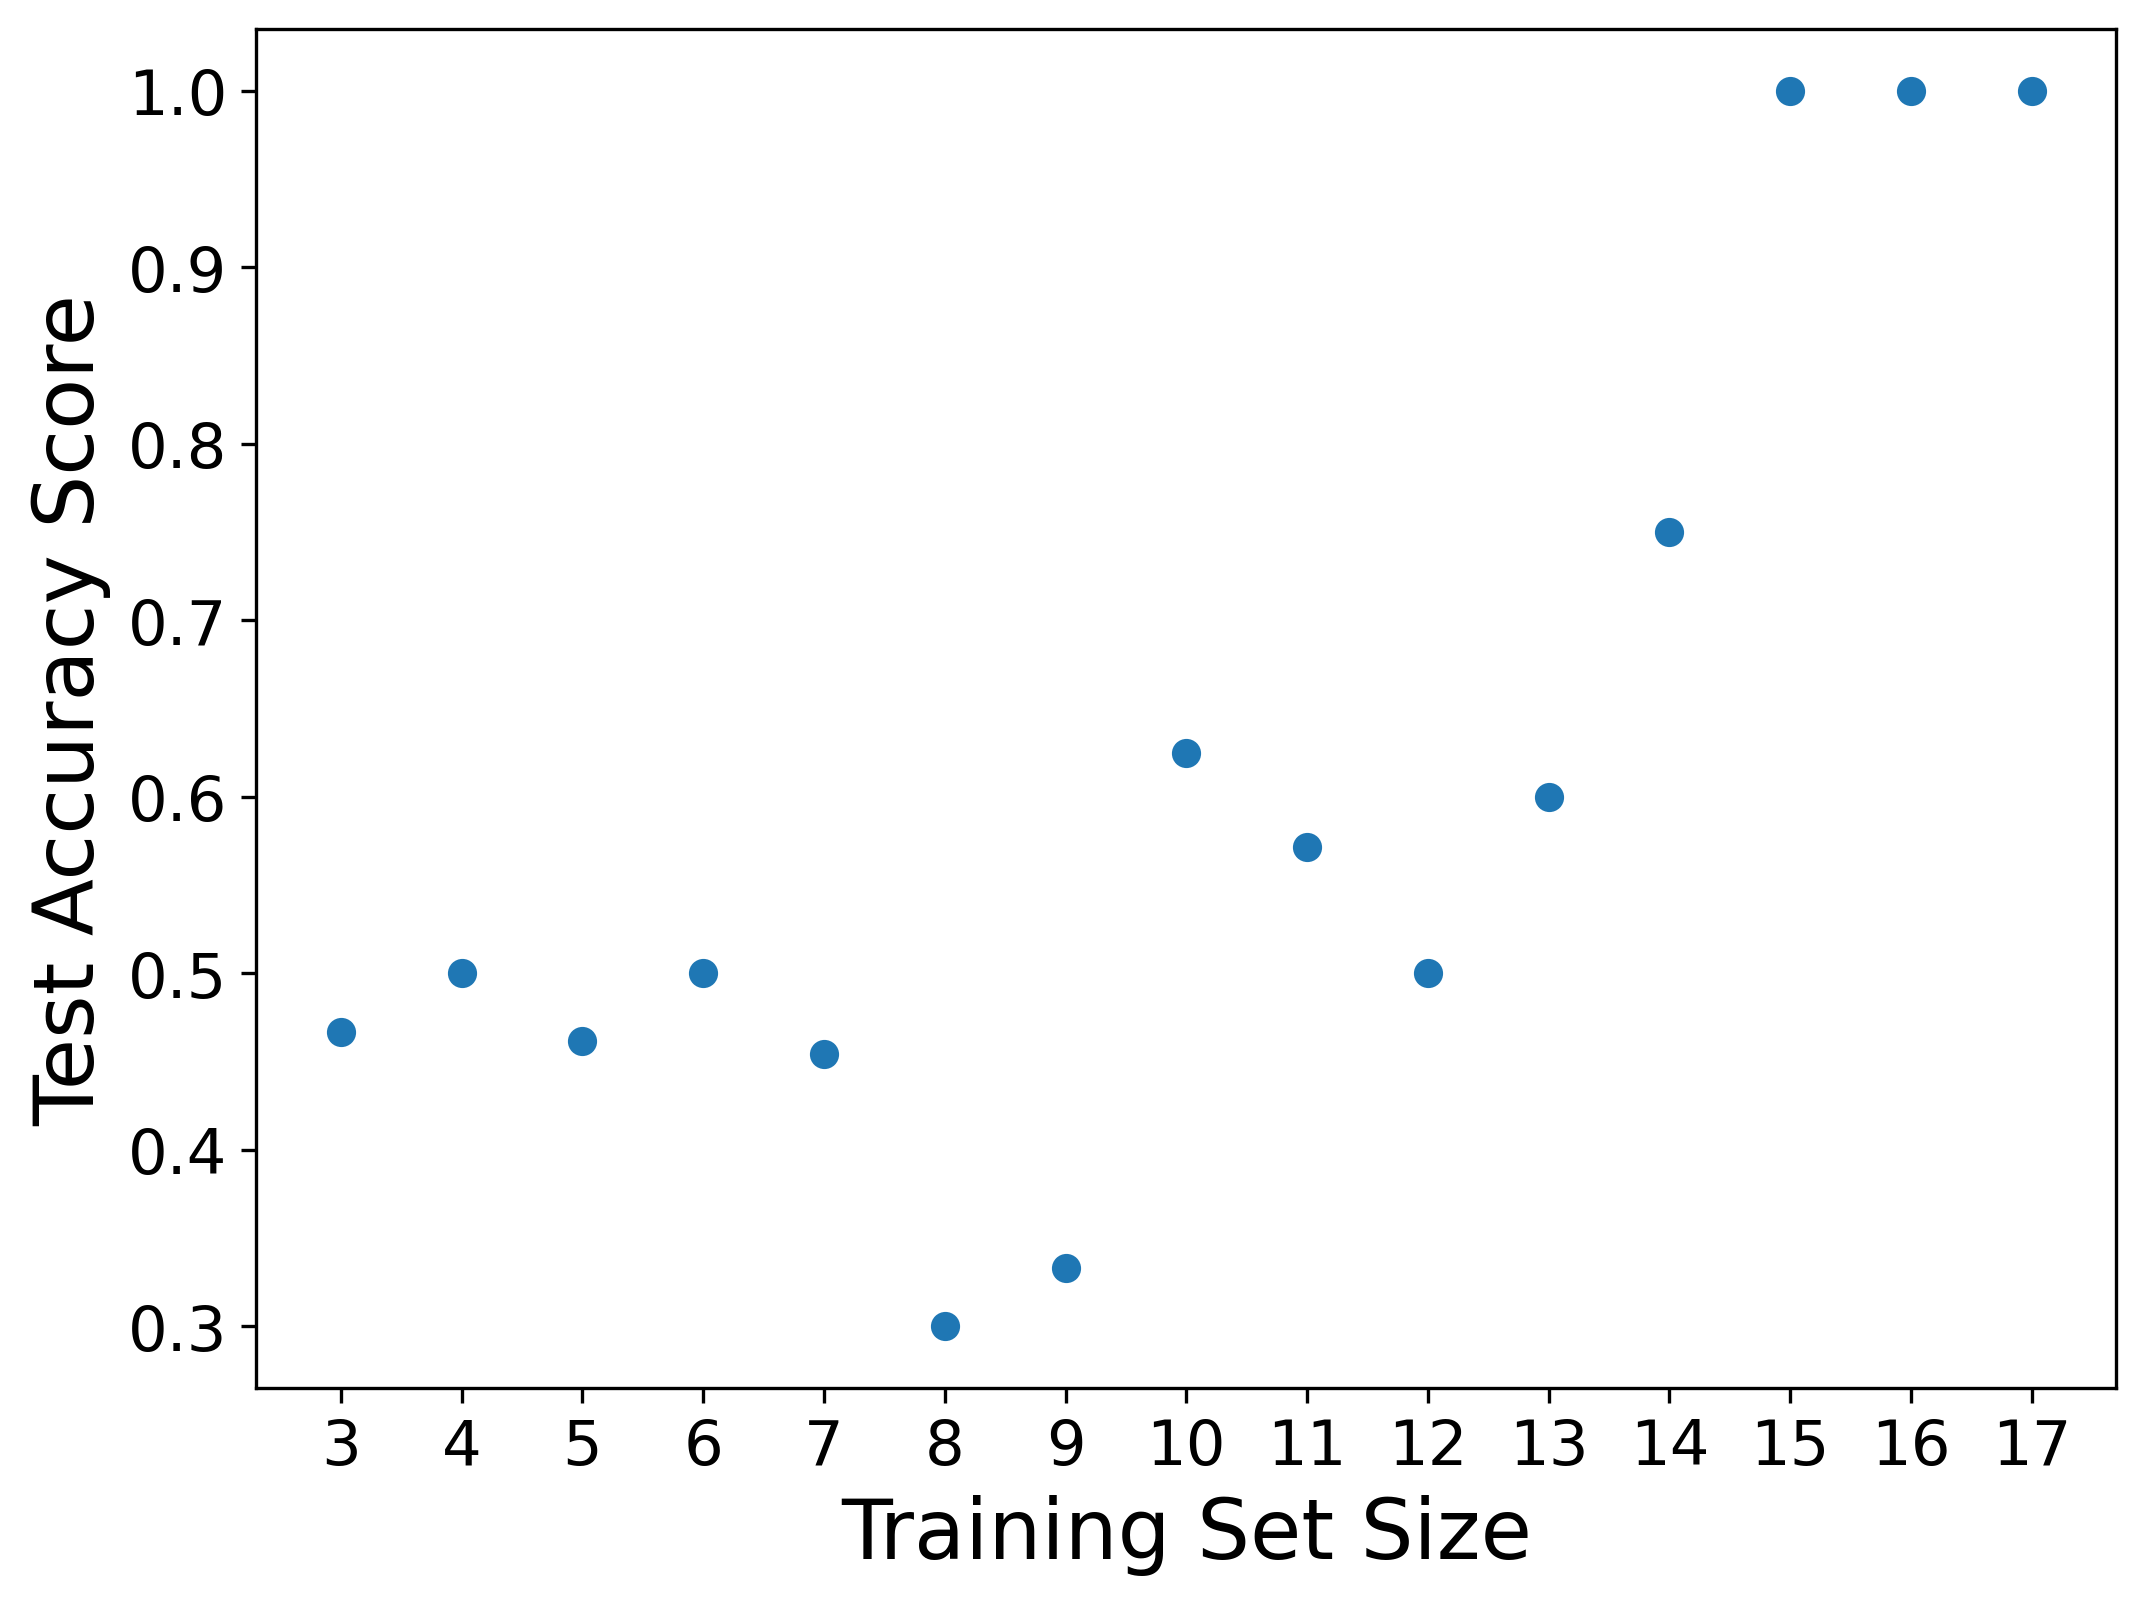

In [95]:
learningSet = pd.read_csv('HPLearningSet.csv')
learningSet = learningSet.drop(learningSet.columns[0], axis=1)

testAccuracyScores = []

for i in range(3, 18):

    trainSet =  learningSet.iloc[:i,:]
    testSet = learningSet.iloc[i:,:]

    trainFeatures = trainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
    testFeatures = testSet.drop(['P_NAME','P_HABITABLE'],axis=1)

    trainTargets = trainSet.P_HABITABLE
    testTargets = testSet.P_HABITABLE

    model = neighbors.KNeighborsClassifier(n_neighbors = 3)

    scaler = sklearn.preprocessing.StandardScaler()
    scaler.fit(trainFeatures)
    scaledTrainFeatures = scaler.transform(trainFeatures)
    scaledTestFeatures = scaler.transform(testFeatures)

    model.fit(scaledTrainFeatures[:,:2], trainTargets)

    testAccuracyScores.append(metrics.accuracy_score(testTargets, model.predict(scaledTestFeatures[:,:2])))

plt.figure(figsize=(8,6))
plt.xlabel('Training Set Size')
plt.ylabel('Test Accuracy Score')
plt.xticks(range(3, 18))

plt.scatter(range(3,18), testAccuracyScores)

print("Average", np.mean(testAccuracyScores))

        In comparing the RobustScaler and StandardScaler, I took the average of the test accuracy scores produced by iterating
        over different training set sizes. The test accuracy score for the RobustScaler method produced an average of
        0.6167600917600917, while the StandardScaler method gave an average of 0.6041674991674991.

        With this training set the RobustScaler method seems to out preform the StandardScaler. It particularly seems to fair
        better with a marginally smaller training set size.
